<a href="https://colab.research.google.com/github/skyaseen005/Avalnche_detection/blob/main/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
nRowsRead = 1000
df1 = pd.read_csv('/content/StevensPass-GraceLakes_4790_feet_2019.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'StevensPass-GraceLakes_4790_feet_2019.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [ ]:
df1.head(5)


,Date/Time (PST),Temperature (deg F),Relative Humidity (%),"Total Snow Depth ("")","Intermittent/Shot Snow ("")"
0,25-06-2019 15:00,47.33,89.90,16.46,-7999.0
1,25-06-2019 14:00,53.80,69.82,10.02,-7999.0
2,25-06-2019 13:00,55.02,65.32,12.31,-7999.0
3,25-06-2019 12:00,56.62,54.77,11.77,-7999.0
4,25-06-2019 11:00,54.93,58.87,12.12,-7999.0


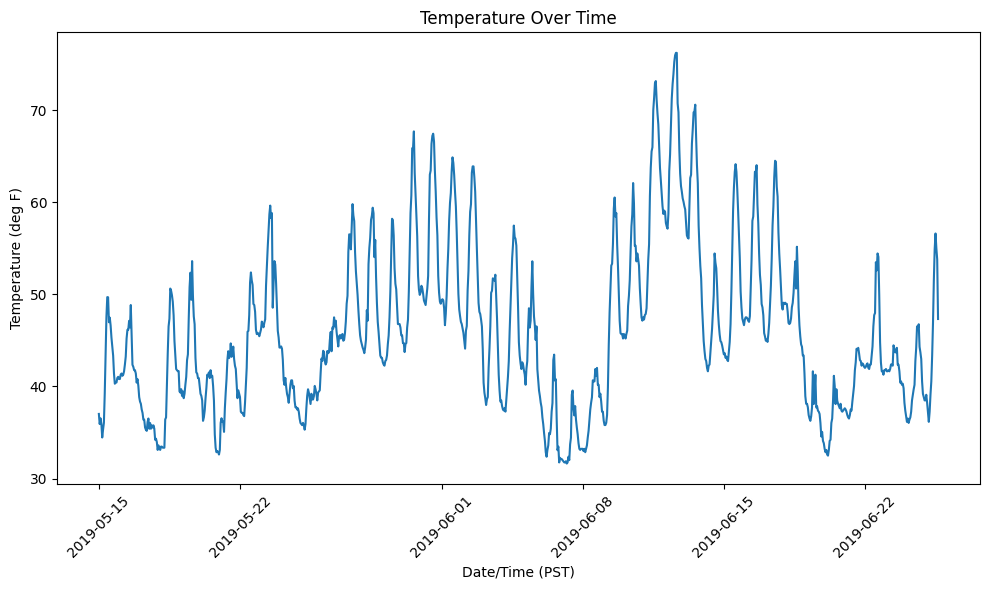

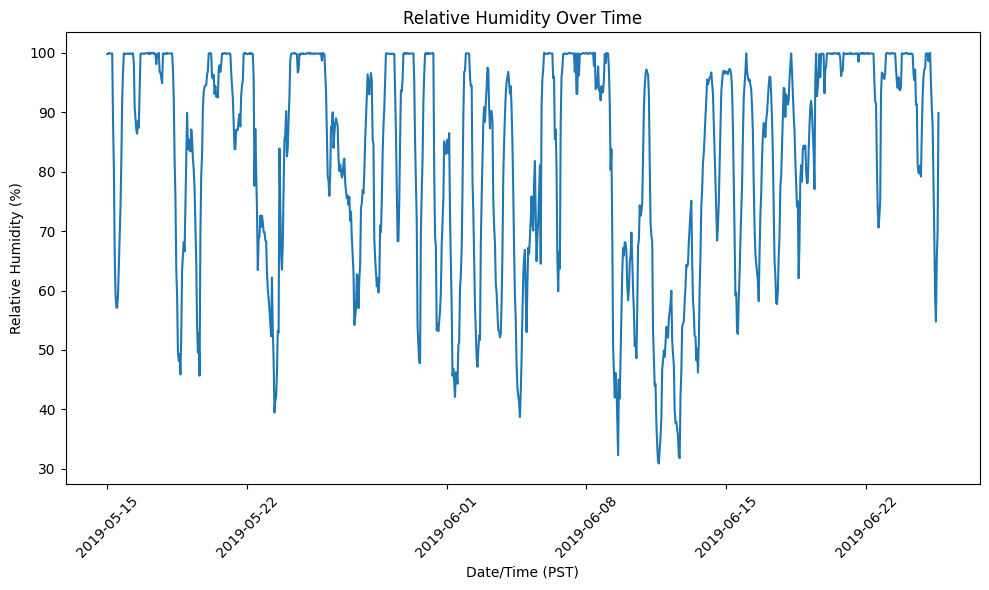

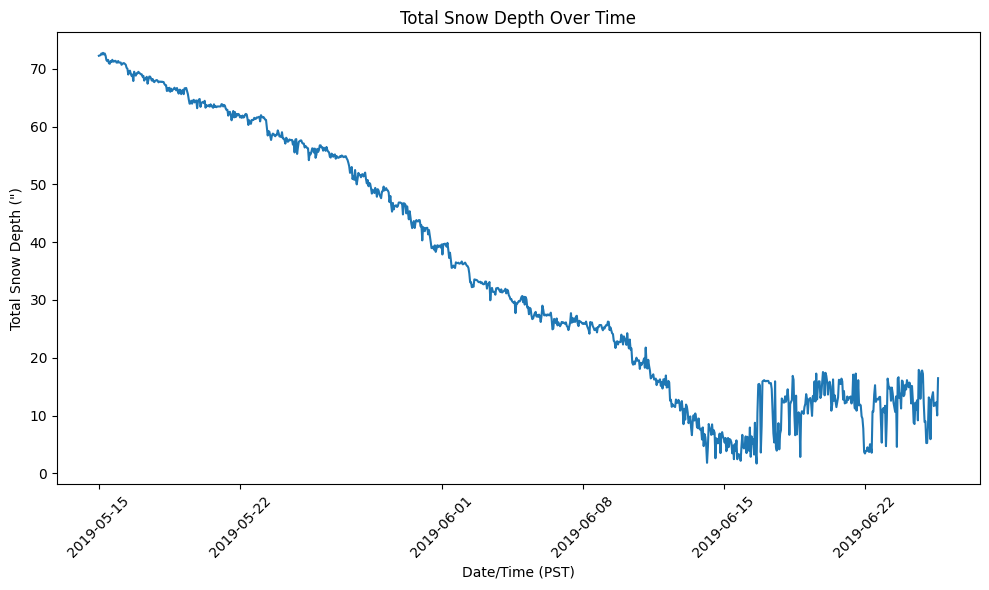

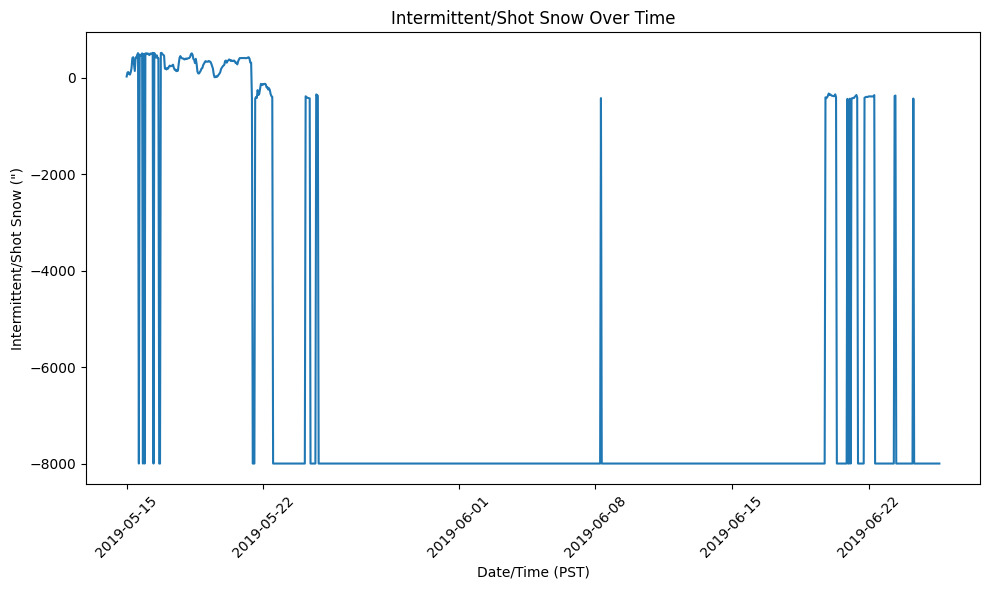

In [ ]:
# prompt: Using dataframe df1: for graphs

import pandas as pd
import matplotlib.pyplot as plt


df1['Date/Time (PST)'] = pd.to_datetime(df1['Date/Time (PST)'], format='%d-%m-%Y %H:%M', errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(df1['Date/Time (PST)'], df1['Temperature (deg F)'])
plt.xlabel('Date/Time (PST)')
plt.ylabel('Temperature (deg F)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df1['Date/Time (PST)'], df1['Relative Humidity (%)'])
plt.xlabel('Date/Time (PST)')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df1['Date/Time (PST)'], df1['Total Snow Depth (\")'])
plt.xlabel('Date/Time (PST)')
plt.ylabel('Total Snow Depth (\")')
plt.title('Total Snow Depth Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df1['Date/Time (PST)'], df1['Intermittent/Shot Snow (\")'])
plt.xlabel('Date/Time (PST)')
plt.ylabel('Intermittent/Shot Snow (\")')
plt.title('Intermittent/Shot Snow Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


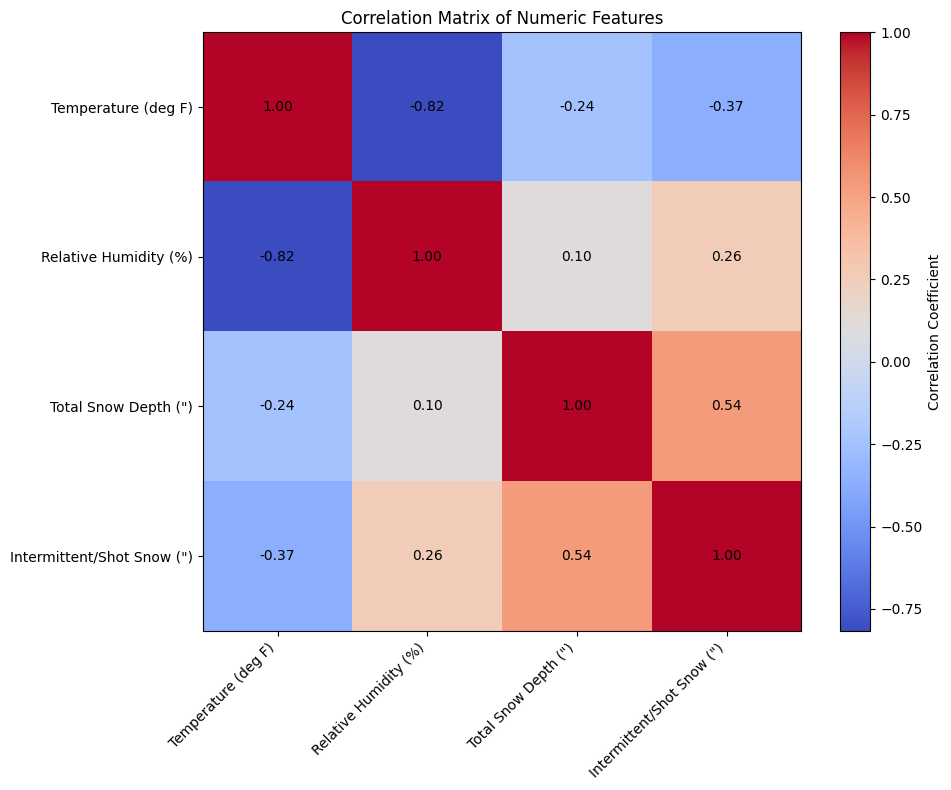

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

numeric_cols = df1.select_dtypes(include=['number'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('Correlation Matrix of Numeric Features')


plt.xticks(range(len(numeric_cols.columns)), numeric_cols.columns, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols.columns)), numeric_cols.columns)


for i in range(len(numeric_cols.columns)):
    for j in range(len(numeric_cols.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


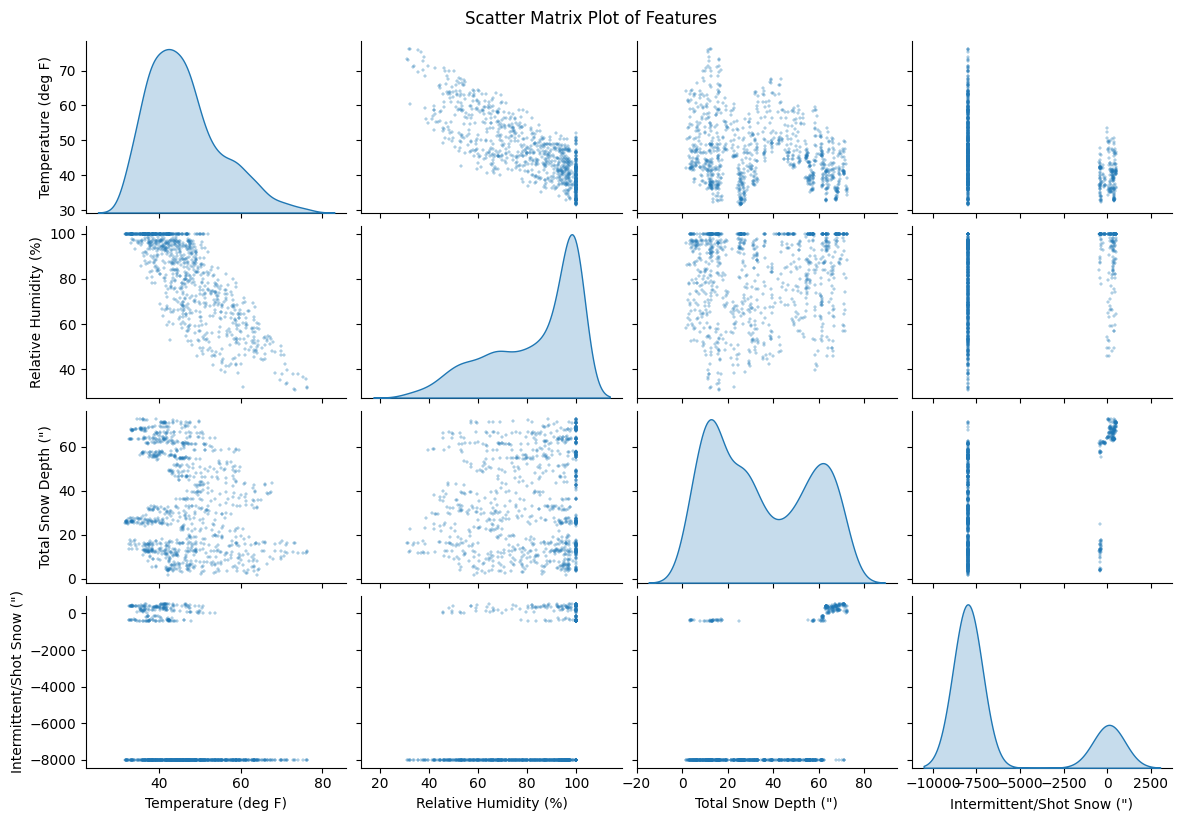

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plotScatterMatrix(df1, plotSize=2, textSize=10)
def plotScatterMatrix(df, plotSize, textSize):


    df = df.select_dtypes(include=[np.number])
    df = df[[col for col in df.columns if df[col].nunique() > 1]]
    if len(df.columns) > 0:
        g = sns.pairplot(df, diag_kind="kde", markers="+", height=plotSize, aspect=1.5, plot_kws={"s":textSize})
        g.fig.suptitle("Scatter Matrix Plot of Features", y=1.02)
        plt.show()